### **Setup Python**

In [1]:
# Importa√ß√£o - Bibliotecas Python

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import warnings

# Remo√ß√£o de avisos do Python
warnings.filterwarnings("ignore")

### **Vari√°veis - EDA TOTVS**

In [2]:
path_processed = "../data/processed/"

### **Leitura - Base de Dados Processadas**

In [3]:
# Leitura os dados da camada "processed"

# Base de dados "dados_clientes.csv"
dados_clientes = pd.read_csv(f"{path_processed}/dados_clientes.csv", sep=",")

# Base de dados "contratacoes_ultimos_12_meses.csv"
contratacoes = pd.read_csv(f"{path_processed}/contratacoes_ultimos_12_meses.csv", sep=",")

# Base de dados "clientes_desde.csv"
clientes_desde = pd.read_csv(f"{path_processed}/clientes_desde.csv", sep=",")

# Base de dados "historico.csv"
historico = pd.read_csv(f"{path_processed}/historico.csv", sep=",")

# Base de dados "mrr.csv"
mrr = pd.read_csv(f"{path_processed}/mrr.csv", sep=",")

# Base de dados "nps.nps_relacional.csv"
nps_relacional = pd.read_csv(f"{path_processed}/nps_relacional.csv", sep=',')

# Base de dados "nps_transacional_aquisicao.csv"
nps_aquisicao = pd.read_csv(f"{path_processed}/nps_transacional_aquisicao.csv", sep=",")

# Base de dados "nps_transacional_implantacao.csv"
nps_implantacao = pd.read_csv(f"{path_processed}/nps_transacional_implantacao.csv", sep=",")

# Base de dados "nps_transacional_onboarding.csv"
nps_onboarding = pd.read_csv(f"{path_processed}/nps_transacional_onboarding.csv", sep=",")

# Base de dados "nps_transacional_produto.csv"
nps_produto = pd.read_csv(f"{path_processed}/nps_transacional_produto.csv", sep=",")

# Base de dados "nps_transacional_suporte.csv"
nps_suporte = pd.read_csv(f"{path_processed}/nps_transacional_suporte.csv", sep=",")

# Ordena√ß√£o das bases de dados de "telemetria_n.csv"
arquivos_telemetria = sorted(glob.glob(f"{path_processed}/telemetria_*.csv"))

# Base de dados "tickets.csv"
tickets = pd.read_csv(f"{path_processed}/tickets.csv", sep=",")

### **An√°lise Explorat√≥rias de Dados - EDA TOTVS**

#### **üìä 1. An√°lises Explorat√≥rias com a Base dados_clientes.csv**

##### **1.1 - Distribui√ß√£o de clientes por segmento**

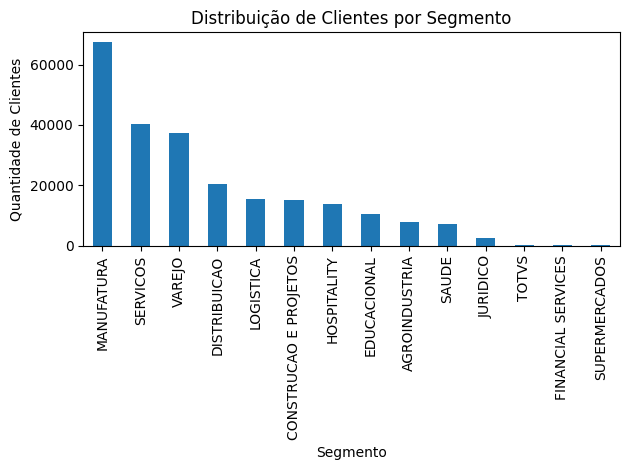

In [4]:
segmento_counts = dados_clientes['segmento'].value_counts()

segmento_counts.plot(kind='bar', title='Distribui√ß√£o de Clientes por Segmento')
plt.xlabel('Segmento')
plt.ylabel('Quantidade de Clientes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### **1.2 - Distribui√ß√£o de clientes por subsegmento**

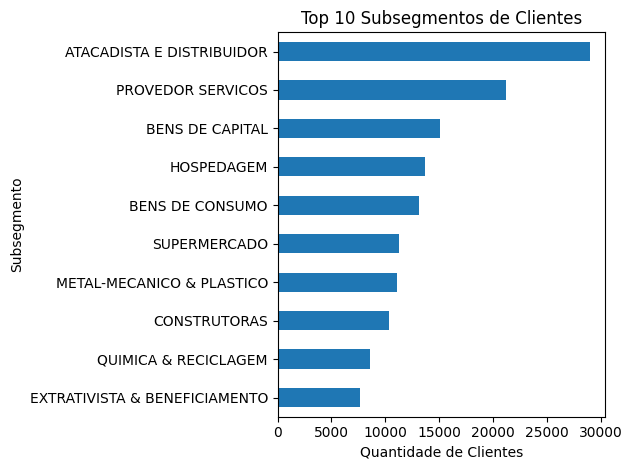

In [5]:
top_subsegmentos = dados_clientes['subsegmento'].value_counts().head(10)

top_subsegmentos.plot(kind='barh', title='Top 10 Subsegmentos de Clientes')
plt.xlabel('Quantidade de Clientes')
plt.ylabel('Subsegmento')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##### **1.3 - Faixas de faturamento**

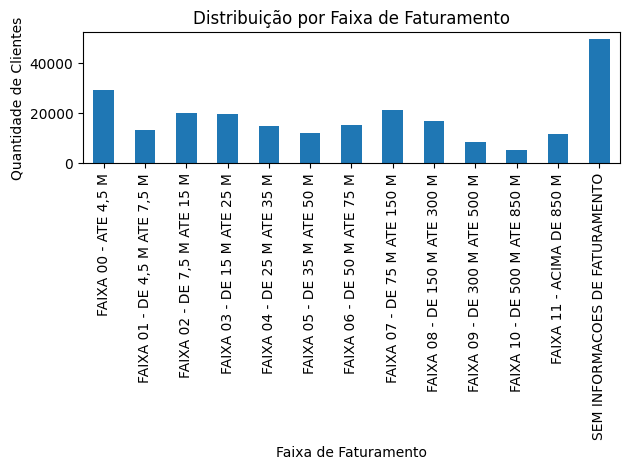

In [6]:
faturamento_counts = dados_clientes['faixa_faturamento'].value_counts().sort_index()

faturamento_counts.plot(kind='bar', title='Distribui√ß√£o por Faixa de Faturamento')
plt.xlabel('Faixa de Faturamento')
plt.ylabel('Quantidade de Clientes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### **1.4 - Situa√ß√£o do contrato**

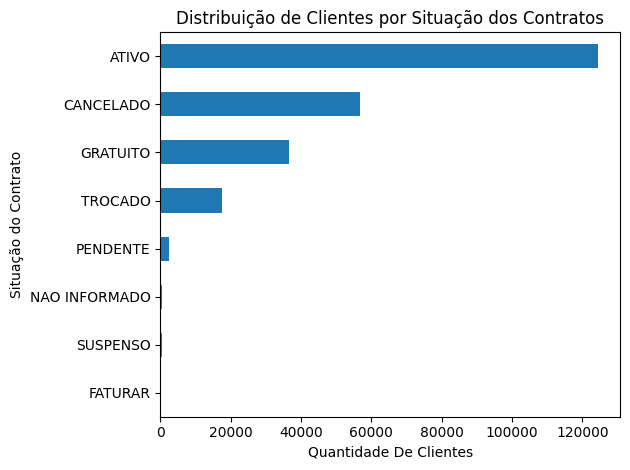

In [7]:
situacao_counts = dados_clientes['situacao_contrato'].value_counts()

situacao_counts.plot(kind='barh', title='Distribui√ß√£o de Clientes por Situa√ß√£o dos Contratos')
plt.xlabel('Quantidade De Clientes')
plt.ylabel('Situa√ß√£o do Contrato')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##### **1.5 - An√°lise geogr√°fica (UF ou cidade)**

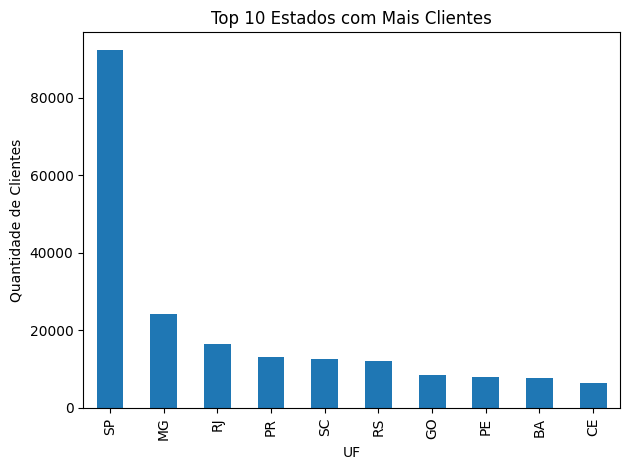

In [8]:
uf_counts = dados_clientes['uf'].value_counts().head(10)

uf_counts.plot(kind='bar', title='Top 10 Estados com Mais Clientes')
plt.xlabel('UF')
plt.ylabel('Quantidade de Clientes')
plt.tight_layout()
plt.show()

##### **1.8 - Contratos por faixa de valor**

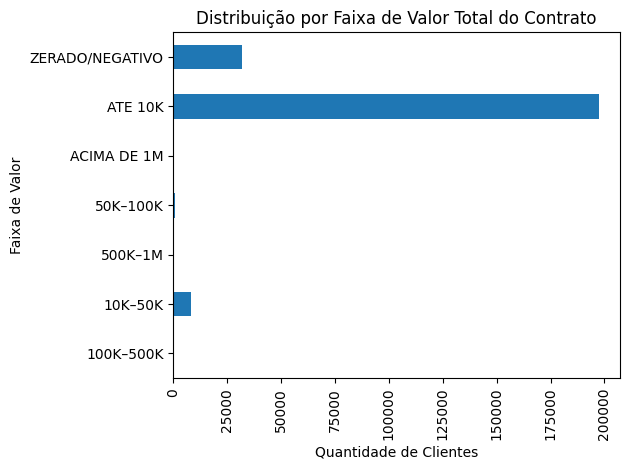

In [9]:
contrato_faixa_valor = dados_clientes['faixa_valor_total_contrato'].value_counts().sort_index()

contrato_faixa_valor.plot(kind='barh', title='Distribui√ß√£o por Faixa de Valor Total do Contrato')
plt.xlabel('Quantidade de Clientes')
plt.ylabel('Faixa de Valor')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### **üìä 2. An√°lises Explorat√≥rias com a Base mrr.csv**

##### **2.1 - Distribui√ß√£o do MRR por faixa de valor**

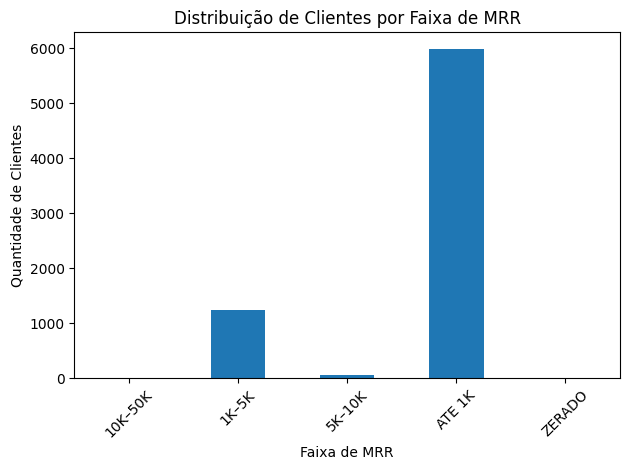

In [10]:
mrr_faixa = mrr['faixa_mrr_12m'].value_counts().sort_index()

mrr_faixa.plot(kind='bar', title='Distribui√ß√£o de Clientes por Faixa de MRR')
plt.xlabel('Faixa de MRR')
plt.ylabel('Quantidade de Clientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### **2.2 - Top clientes com maior MRR**

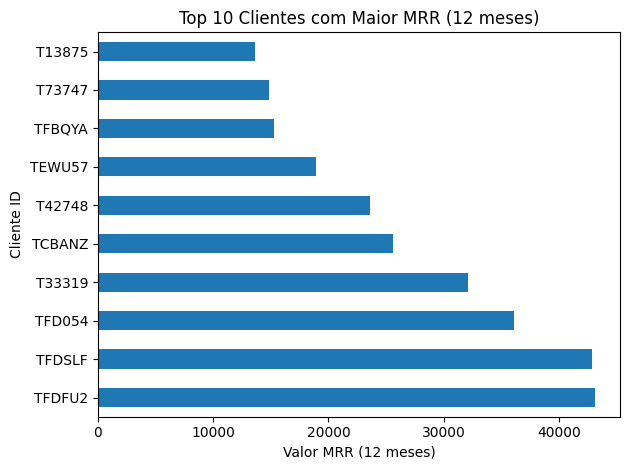

In [11]:
top_clientes_mrr = mrr.groupby('cliente_id')['mrr_12m'].sum().sort_values(ascending=False).head(10)

top_clientes_mrr.plot(kind='barh', title='Top 10 Clientes com Maior MRR (12 meses)')
plt.xlabel('Valor MRR (12 meses)')
plt.ylabel('Cliente ID')
plt.tight_layout()
plt.show()

#### **üìä 3. An√°lises Explorat√≥rias com as Bases de NPS**

In [12]:
# Vari√°veis de interesse para an√°lise de NPS

# Dicion√°rio para armazenar os DataFrames de NPS
dicionario_nps_dataframe = {
    'Relacional': nps_relacional,
    'Aquisicao': nps_aquisicao,
    'Implantacao': nps_implantacao,
    'Onboarding': nps_onboarding,
    'Produto': nps_produto,
    'Suporte': nps_suporte
}

# Dicion√°rio para armazenar os DataFrames de NPS que possuem data de resposta
dicionario_nps_dataframe_com_data = {
    'Relacional': nps_relacional,
    'Aquisicao': nps_aquisicao,
    'Implantacao': nps_implantacao,
    'Onboarding': nps_onboarding,
    'Produto': nps_produto,
}

##### **3.1 - Distribui√ß√£o geral das categorias NPS**

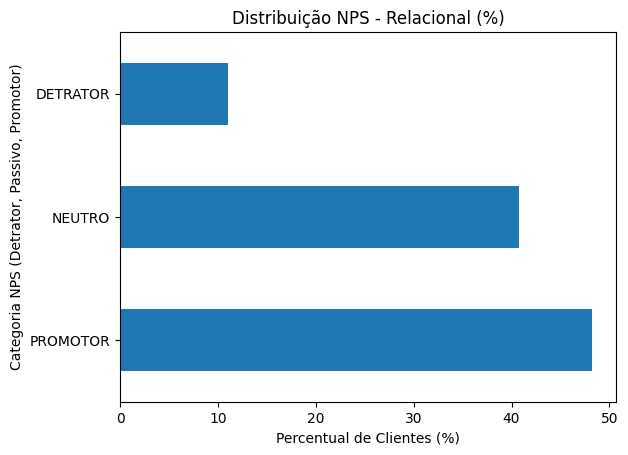

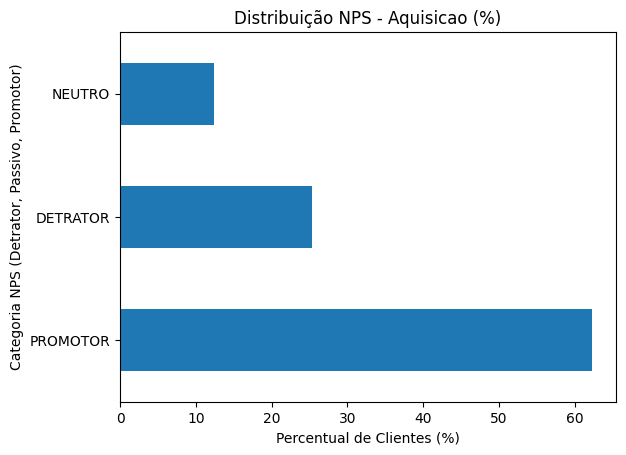

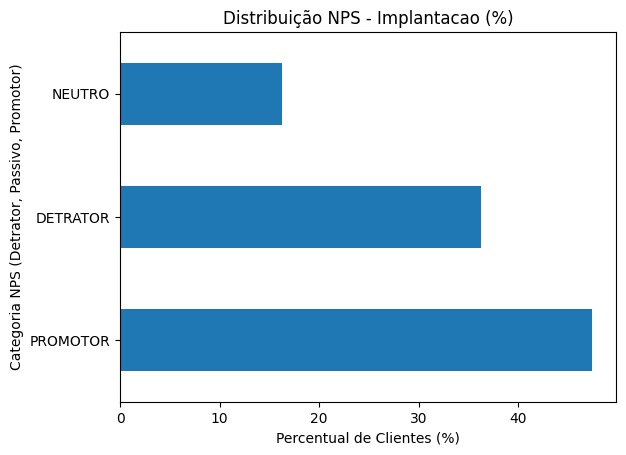

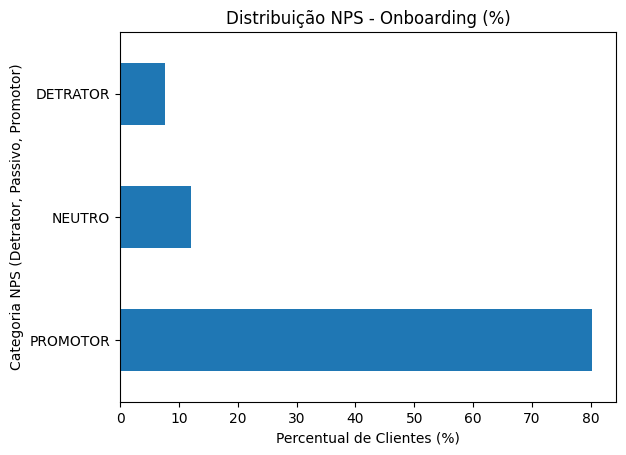

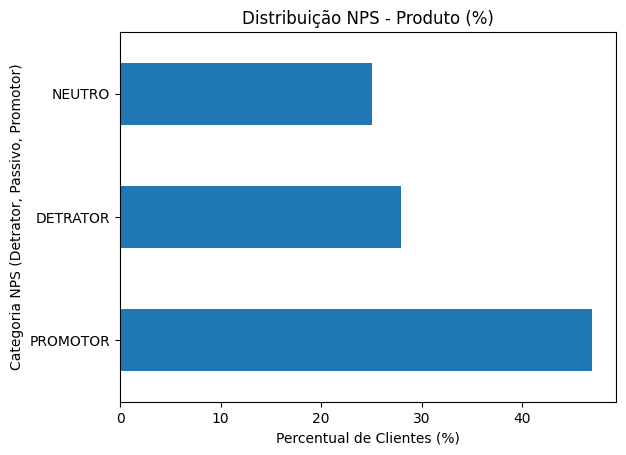

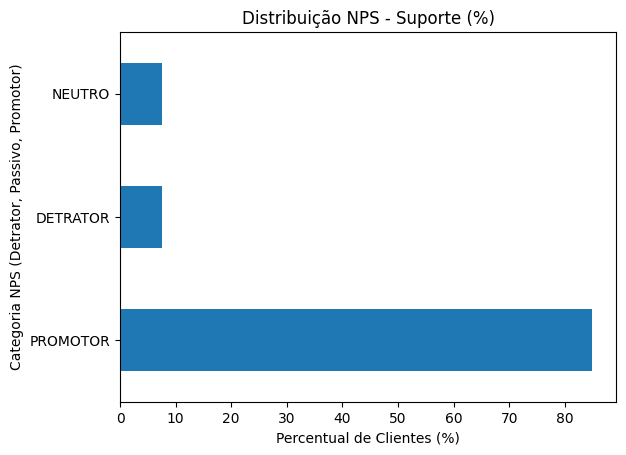

In [13]:
# Categoriza√ß√£o de NPS (Detrator, Passivo, Promotor)

for tipo_nps, df_nps in dicionario_nps_dataframe.items():
    # Distribui√ß√£o de categorias NPS (DETRATOR, PASSIVO, PROMOTOR)
    distribuicao_categoria_nps = df_nps['categoria_nps'].value_counts(normalize=True).mul(100).round(2)
    distribuicao_categoria_nps.plot(kind='barh', title=f'Distribui√ß√£o NPS - {tipo_nps} (%)')
    plt.ylabel('Categoria NPS (Detrator, Passivo, Promotor)')
    plt.xlabel('Percentual de Clientes (%)')
    plt.show()

##### **3.2 - Evolu√ß√£o mensal do NPS por base (caso possua data de resposta)**

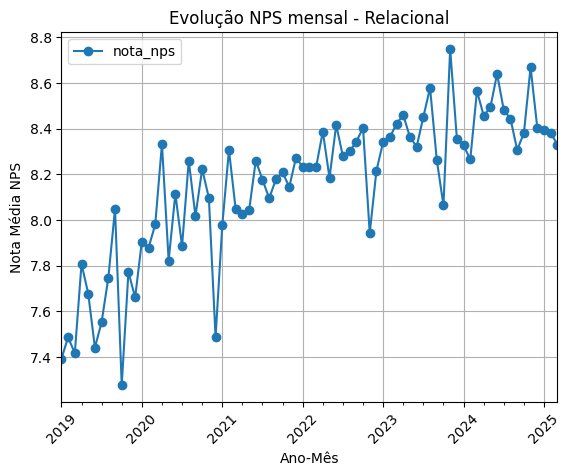

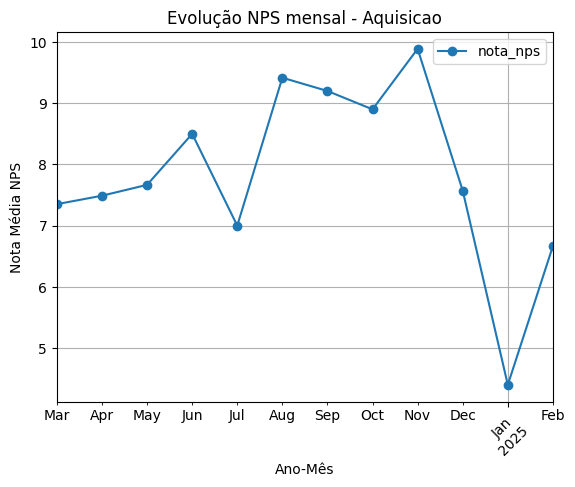

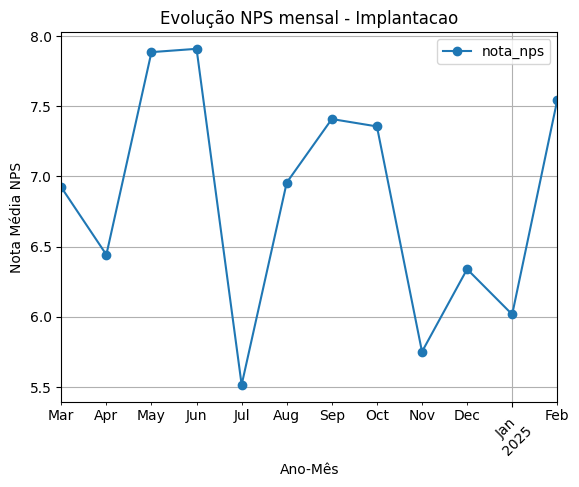

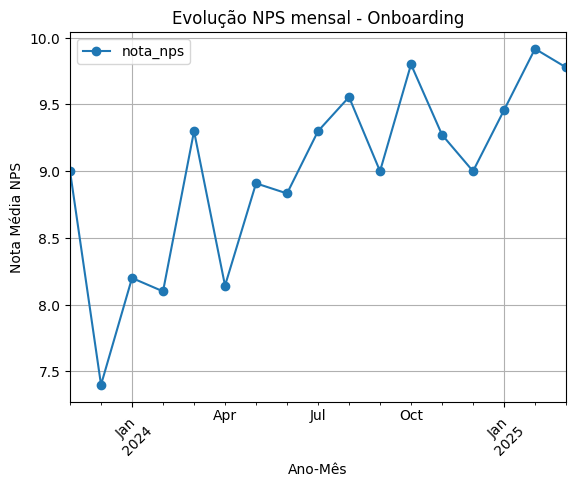

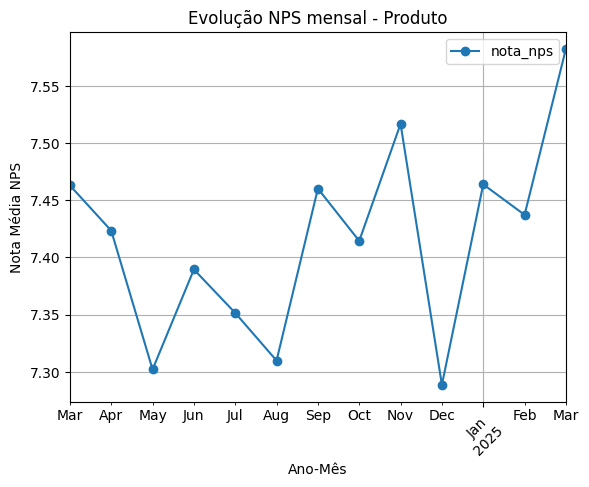

In [14]:
# An√°lise de correla√ß√£o entre NPS e outras vari√°veis

for tipo_nps, df_nps in dicionario_nps_dataframe_com_data.items():
    df_nps['data_resposta'] = pd.to_datetime(df_nps['data_resposta'])
    df_nps['ano_mes_resposta'] = df_nps['data_resposta'].dt.to_period('M')

    nps_mensal = df_nps.groupby('ano_mes_resposta')['nota_nps'].mean().reset_index()

    nps_mensal.plot(x='ano_mes_resposta', y='nota_nps', kind='line', marker='o', title=f'Evolu√ß√£o NPS mensal - {tipo_nps}')
    plt.ylabel('Nota M√©dia NPS')
    plt.xlabel('Ano-M√™s')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

##### **3.3 - Comparativo entre diferentes frentes**

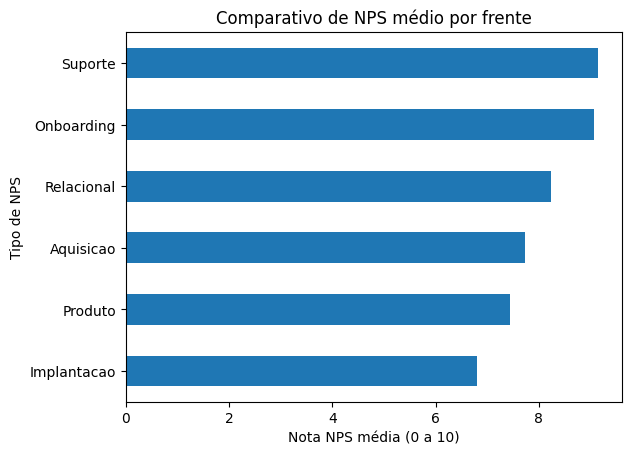

In [15]:
# An√°lise de correla√ß√£o entre NPS e outras vari√°veis

lista_dataframes_nps = []
for tipo_nps, df_nps in dicionario_nps_dataframe.items():
    df_nps['tipo_nps'] = tipo_nps
    lista_dataframes_nps.append(df_nps)

df_nps = pd.concat(lista_dataframes_nps)

# Comparar m√©dia das notas NPS por frente
comparativo = df_nps.groupby('tipo_nps')['nota_nps'].mean().sort_values()

comparativo.plot(kind='barh', title='Comparativo de NPS m√©dio por frente')
plt.ylabel('Tipo de NPS')
plt.xlabel('Nota NPS m√©dia (0 a 10)')
plt.show()

##### **3.4 - An√°lise de satisfa√ß√£o por quest√£o adicional**

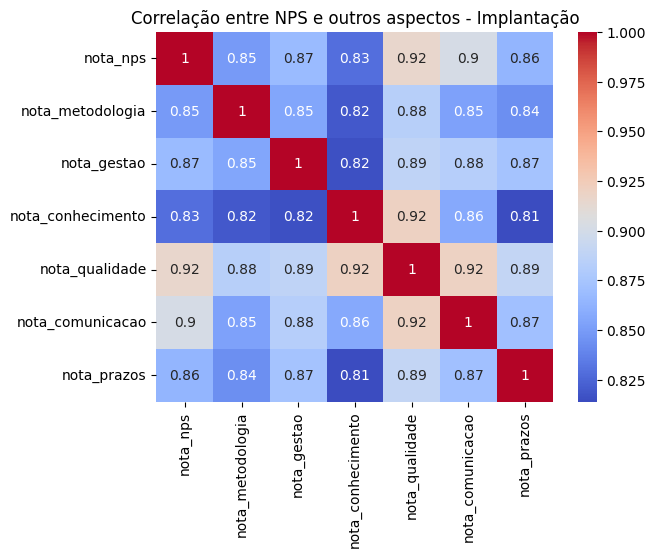

In [16]:
# An√°lise de correla√ß√£o entre NPS e outras vari√°veis - Implanta√ß√£o

colunas_corr = [
    'nota_nps',
    'nota_metodologia',
    'nota_gestao',
    'nota_conhecimento',
    'nota_qualidade',
    'nota_comunicacao',
    'nota_prazos'
]

sns.heatmap(nps_implantacao[colunas_corr].corr(), annot=True, cmap='coolwarm')
plt.title('Correla√ß√£o entre NPS e outros aspectos - Implanta√ß√£o')
plt.show()

#### **üìä 4. An√°lises Explorat√≥rias com as Bases de Telemetria**

In [17]:
df_telemtria = pd.DataFrame()

for arquivos_telemetria in arquivos_telemetria:
    df_telemtria_temp = pd.read_csv(arquivos_telemetria, sep=',')
    df_telemtria = pd.concat([df_telemtria, df_telemtria_temp], ignore_index=True)

##### **4.1 - Volume de uso por m√™s (eventos registrados)**

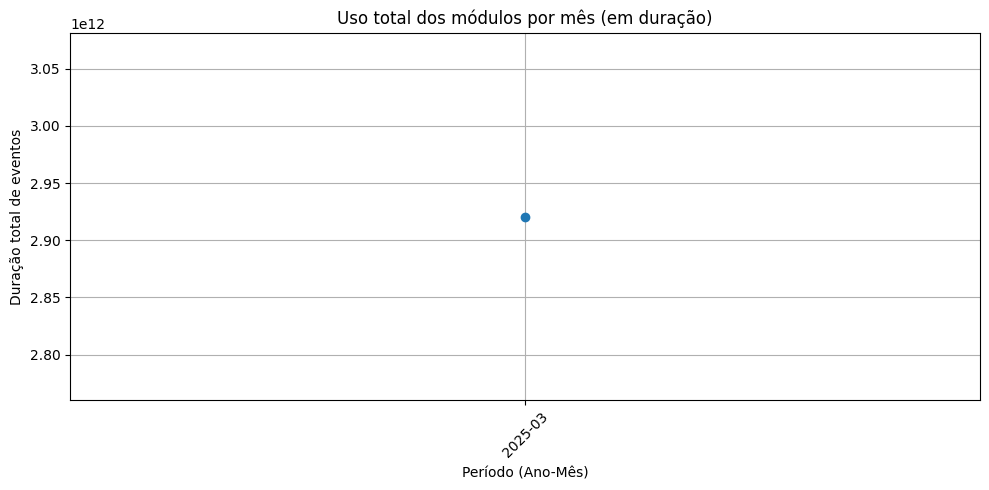

In [18]:
# Agrupar por ano e m√™s para calcular o uso total dos m√≥dulos

uso_mensal = df_telemtria.groupby(['ano_referencia', 'mes_referencia'])['duracao_evento'].sum().reset_index()

# Combinar ano e m√™s para melhor visualiza√ß√£o
uso_mensal['periodo'] = uso_mensal['ano_referencia'].astype(str) + '-' + uso_mensal['mes_referencia'].astype(str).str.zfill(2)

plt.figure(figsize=(10, 5))
plt.plot(uso_mensal['periodo'], uso_mensal['duracao_evento'], marker='o')
plt.title('Uso total dos m√≥dulos por m√™s (em dura√ß√£o)')
plt.xlabel('Per√≠odo (Ano-M√™s)')
plt.ylabel('Dura√ß√£o total de eventos')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

##### **4.2 - Licenciamento: Distribui√ß√£o por status de licen√ßa**

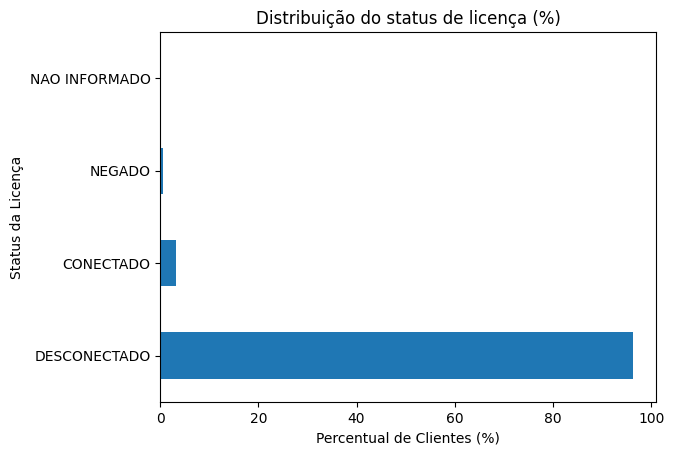

In [19]:
df_telemtria['status_licenca'].value_counts(normalize=True).mul(100).round(2).plot(
    kind='barh', title='Distribui√ß√£o do status de licen√ßa (%)'
)
plt.ylabel('Status da Licen√ßa')
plt.xlabel('Percentual de Clientes (%)')
plt.show()

##### **4.3 - Clientes mais ativos (tempo total)**

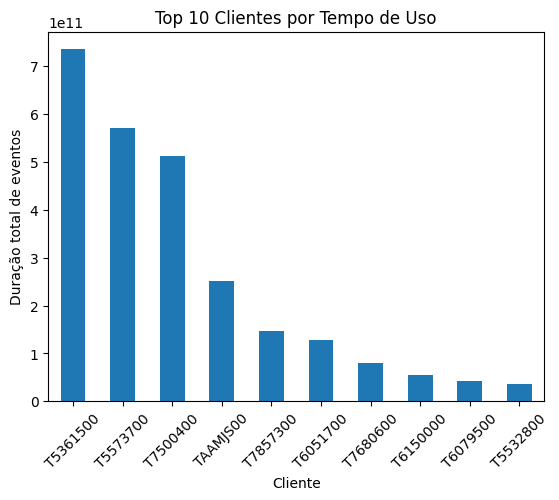

In [20]:
# An√°lise dos clientes mais ativos (tempo total de uso)

clientes_ativos = df_telemtria.groupby('cliente_id')['duracao_evento'].sum().sort_values(ascending=False).head(10)

clientes_ativos.plot(kind='bar', title='Top 10 Clientes por Tempo de Uso')
plt.ylabel('Dura√ß√£o total de eventos')
plt.xlabel('Cliente')
plt.xticks(rotation=45)
plt.show()

##### **4.4 - M√≥dulos mais utilizados**

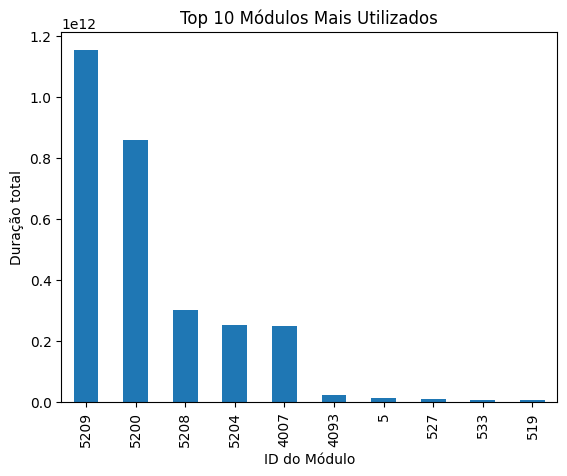

In [21]:
# An√°lise dos m√≥dulos mais utilizados

modulos = df_telemtria.groupby('modulo_id')['duracao_evento'].sum().sort_values(ascending=False).head(10)

modulos.plot(kind='bar', title='Top 10 M√≥dulos Mais Utilizados')
plt.ylabel('Dura√ß√£o total')
plt.xlabel('ID do M√≥dulo')
plt.show()

##### **4.5 - Uso por linha de produto**

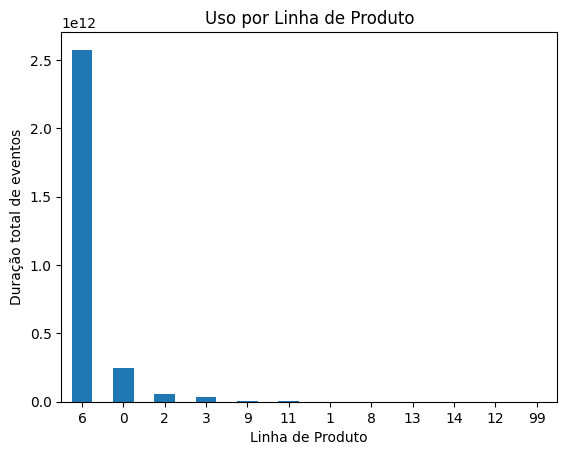

In [22]:
# An√°lise do uso por linha de produto

uso_linha_produto = df_telemtria.groupby('linha_produto_id')['duracao_evento'].sum().sort_values(ascending=False)

uso_linha_produto.plot(kind='bar', title='Uso por Linha de Produto')
plt.ylabel('Dura√ß√£o total de eventos')
plt.xlabel('Linha de Produto')
plt.xticks(rotation=0)
plt.show()

##### **4.6 - Uso por status de licen√ßa e ano**

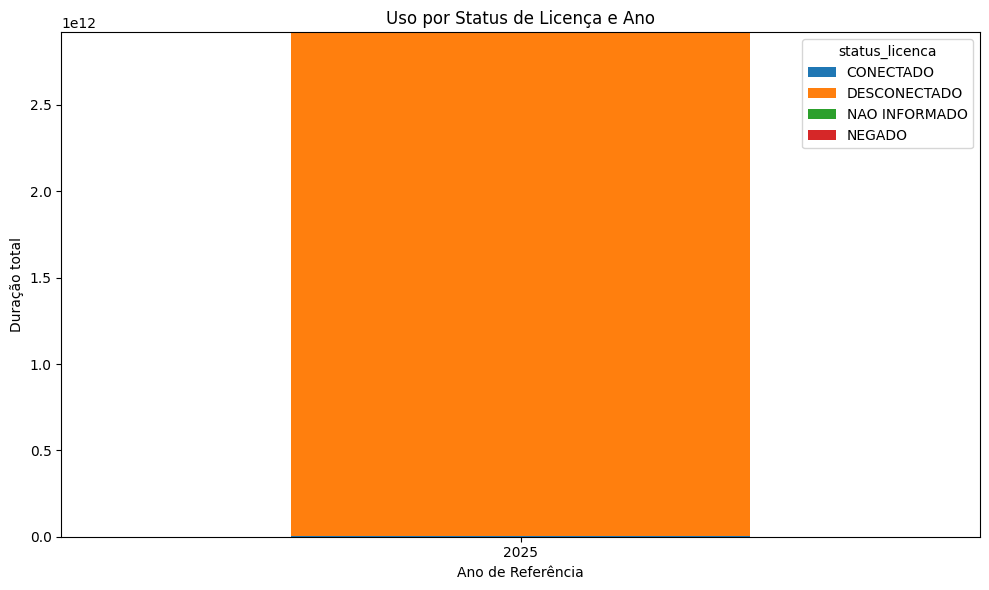

In [23]:
# An√°lise do uso por status de licen√ßa e ano

uso_licenca_ano = df_telemtria.groupby(['ano_referencia', 'status_licenca'])['duracao_evento'].sum().unstack()

uso_licenca_ano.plot(kind='bar', stacked=True, figsize=(10,6), title='Uso por Status de Licen√ßa e Ano')
plt.ylabel('Dura√ß√£o total')
plt.xlabel('Ano de Refer√™ncia')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### **üìä 5. An√°lises Explorat√≥rias com as Bases de Telemetria**

##### **5.1 - Volume de tickets por m√™s**

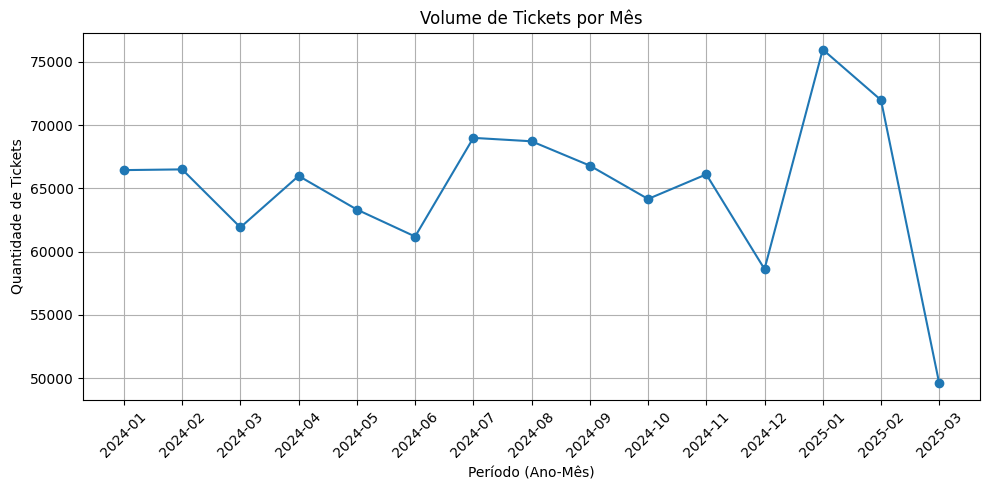

In [24]:
# An√°lise do volume de tickets por m√™s

volume_mensal = tickets.groupby(['ano_criacao', 'mes_criacao'])['ticket_id'].count().reset_index()
volume_mensal['periodo'] = volume_mensal['ano_criacao'].astype(str) + '-' + volume_mensal['mes_criacao'].astype(str).str.zfill(2)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(volume_mensal['periodo'], volume_mensal['ticket_id'], marker='o')
plt.title('Volume de Tickets por M√™s')
plt.xlabel('Per√≠odo (Ano-M√™s)')
plt.ylabel('Quantidade de Tickets')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

##### **5.2 - Distribui√ß√£o por tipo de ticket**

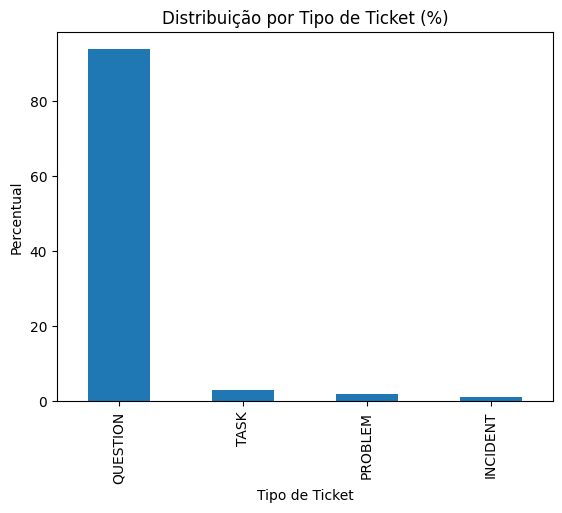

In [25]:
# Distribui√ß√£o por tipo de ticket

tickets['tipo_ticket'].value_counts(normalize=True).mul(100).round(1).plot(
    kind='bar', title='Distribui√ß√£o por Tipo de Ticket (%)'
)
plt.ylabel('Percentual')
plt.xlabel('Tipo de Ticket')
plt.show()


##### **5.3 - Status dos tickets**

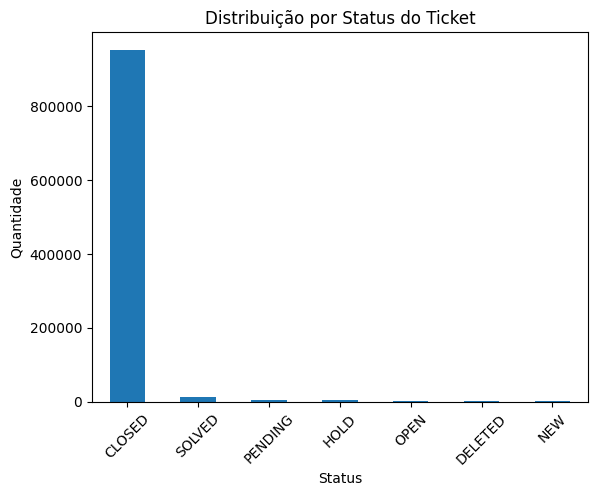

In [26]:
# Distribui√ß√£o por status dos tickets

tickets['status_ticket'].value_counts().plot(
    kind='bar', title='Distribui√ß√£o por Status do Ticket'
)
plt.ylabel('Quantidade')
plt.xlabel('Status')
plt.xticks(rotation=45)
plt.show()

##### **5.4 - Distribui√ß√£o por prioridade**

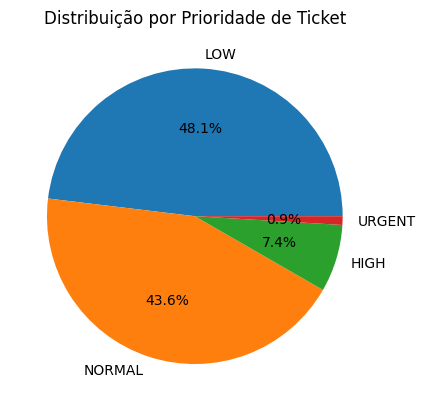

In [27]:
# Distribui√ß√£o por prioridade dos tickets

tickets['prioridade_ticket'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', title='Distribui√ß√£o por Prioridade de Ticket'
)
plt.ylabel('')
plt.show()

##### **5.5 - Grupos com maior volume de tickets**

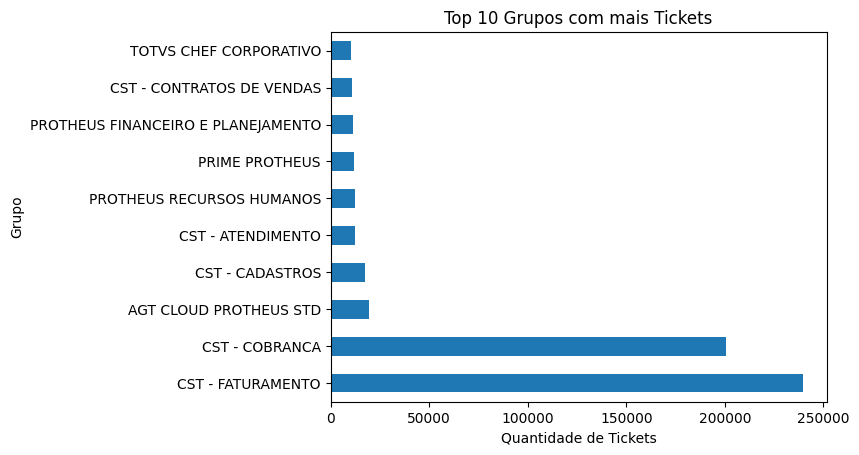

In [28]:
top_grupos = tickets['nome_grupo'].value_counts().head(10)

top_grupos.plot(kind='barh', title='Top 10 Grupos com mais Tickets')
plt.ylabel('Grupo')
plt.xlabel('Quantidade de Tickets')
plt.show()

##### **5.6 - Clientes com mais abertura de chamados**

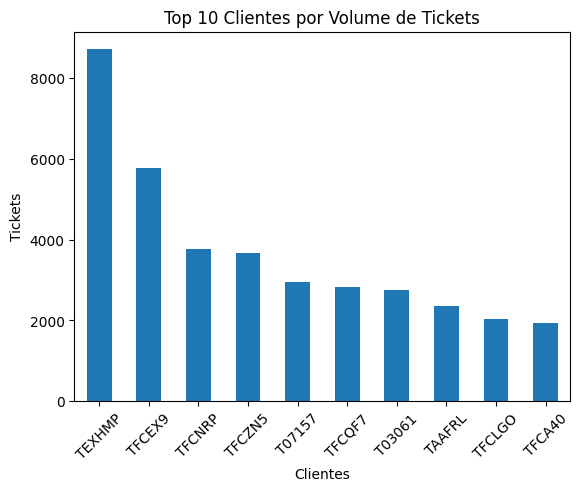

In [29]:
top_orgs = tickets['cliente_id'].value_counts().head(10)

top_orgs.plot(kind='bar', title='Top 10 Clientes por Volume de Tickets')
plt.ylabel('Tickets')
plt.xlabel('Clientes')
plt.xticks(rotation=45)
plt.show()